In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [5]:
X_train = np.array([[10, 20], [20, 30], [30, 40], [40, 50], [50, 60]])
y_train = np.array([1,1,2,2,2])

X_test = np.array([[50,40],[30,40]])

for k in [2,3,4,5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    print(f"K = {k}")
    for point, prediction in zip (X_test,predictions):
        print(f"Points {point} is classified as class {prediction}")
    print()
    

K = 2
Points [50 40] is classified as class 2
Points [30 40] is classified as class 1

K = 3
Points [50 40] is classified as class 2
Points [30 40] is classified as class 2

K = 4
Points [50 40] is classified as class 2
Points [30 40] is classified as class 1

K = 5
Points [50 40] is classified as class 2
Points [30 40] is classified as class 2



In [19]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt 


In [8]:
folder = "D:\Tinu Project\Projects Files Excel"
file = "train_new(in).csv"

data = os.path.join(folder,file)

df = pd.read_csv(data)

In [9]:
df.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity
0,55+,53.342,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,45:150:1,3
1,25-39,154.960,alive,none,none,1,m,26,2001,1968,unavail,driver,0,76:40:01,3
2,55+,38.994,alive,none,none,1,f,51,2002,1994,unavail,driver,0,0.586122685,3
3,25-39,168.568,alive,airbag,belted,1,m,27,1998,1996,deploy,pass,1,9:17:01,3
4,24-Oct,27.751,alive,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,2:02:02,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17565 entries, 0 to 17564
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        17565 non-null  object 
 1   weight       17565 non-null  float64
 2   dead         17565 non-null  object 
 3   airbag       17565 non-null  object 
 4   seatbelt     17565 non-null  object 
 5   frontal      17565 non-null  int64  
 6   sex          17565 non-null  object 
 7   ageOFocc     17565 non-null  int64  
 8   yearacc      17565 non-null  int64  
 9   yearVeh      17565 non-null  int64  
 10  abcat        17565 non-null  object 
 11  occRole      17565 non-null  object 
 12  deploy       17565 non-null  int64  
 13  caseid       17565 non-null  object 
 14  injSeverity  17565 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 2.0+ MB


In [11]:
df.describe()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000,17565.000000
mean,458.763017,0.643439,37.212411,1999.558497,1992.843894,0.340165,1.713066
std,1471.148421,0.478997,17.945232,1.702162,5.568838,0.473778,1.290565
min,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,32.264000,0.000000,22.000000,1998.000000,1989.000000,0.000000,1.000000
50%,86.986000,1.000000,33.000000,2000.000000,1994.000000,0.000000,2.000000
75%,357.283000,1.000000,48.000000,2001.000000,1997.000000,1.000000,3.000000
max,57871.595000,1.000000,97.000000,2002.000000,2003.000000,1.000000,6.000000


In [12]:
df.isnull().sum()

dvcat          0
weight         0
dead           0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
caseid         0
injSeverity    0
dtype: int64

In [13]:
df.columns

Index(['dvcat', 'weight', 'dead', 'airbag', 'seatbelt', 'frontal', 'sex',
       'ageOFocc', 'yearacc', 'yearVeh', 'abcat', 'occRole', 'deploy',
       'caseid', 'injSeverity'],
      dtype='object')

In [24]:
df.dropna(inplace=True)

df = pd.get_dummies(df,drop_first=True)

X = df.drop(['injSeverity'],axis=1)
y = df['injSeverity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_test_scaled = scaler.transform(X_test_df)

In [25]:
# Logistic Regression Model :

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test,y_pred_log))
print("Classification Reports :", classification_report(y_test,y_pred_log))
print("Confusion Matrix", confusion_matrix(y_test,y_pred_log))

# KNN Model 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)

# Evaluate the KNN model
print("\nKNN Model:")
print("Accuracy:", accuracy_score(y_test,y_pred_knn))
print("Classification Reports :", classification_report(y_test,y_pred_knn))
print("confusion Matrix :", confusion_matrix(y_test,y_pred_knn))



C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model:
Accuracy: 0.42783945345858243
Classification Reports :               precision    recall  f1-score   support

           0       0.53      0.45      0.49       885
           1       0.32      0.01      0.02       732
           2       0.00      0.00      0.00       570
           3       0.40      0.95      0.56      1152
           4       0.00      0.00      0.00       158
           5       0.00      0.00      0.00        16

    accuracy                           0.43      3513
   macro avg       0.21      0.24      0.18      3513
weighted avg       0.33      0.43      0.31      3513

Confusion Matrix [[ 397   10    0  478    0    0]
 [ 192    9    0  531    0    0]
 [ 102    6    0  462    0    0]
 [  52    3    0 1097    0    0]
 [   0    0    0  158    0    0]
 [   3    0    0   13    0    0]]


C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



KNN Model:
Accuracy: 0.36208368915456873
Classification Reports :               precision    recall  f1-score   support

           0       0.39      0.48      0.43       885
           1       0.25      0.25      0.25       732
           2       0.19      0.13      0.16       570
           3       0.47      0.51      0.49      1152
           4       0.21      0.04      0.06       158
           5       0.00      0.00      0.00        16

    accuracy                           0.36      3513
   macro avg       0.25      0.23      0.23      3513
weighted avg       0.34      0.36      0.35      3513

confusion Matrix : [[424 188  83 187   3   0]
 [273 181  90 184   4   0]
 [174 124  76 194   2   0]
 [205 215 134 585  13   0]
 [ 16  19  18  99   6   0]
 [  6   4   1   5   0   0]]


C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


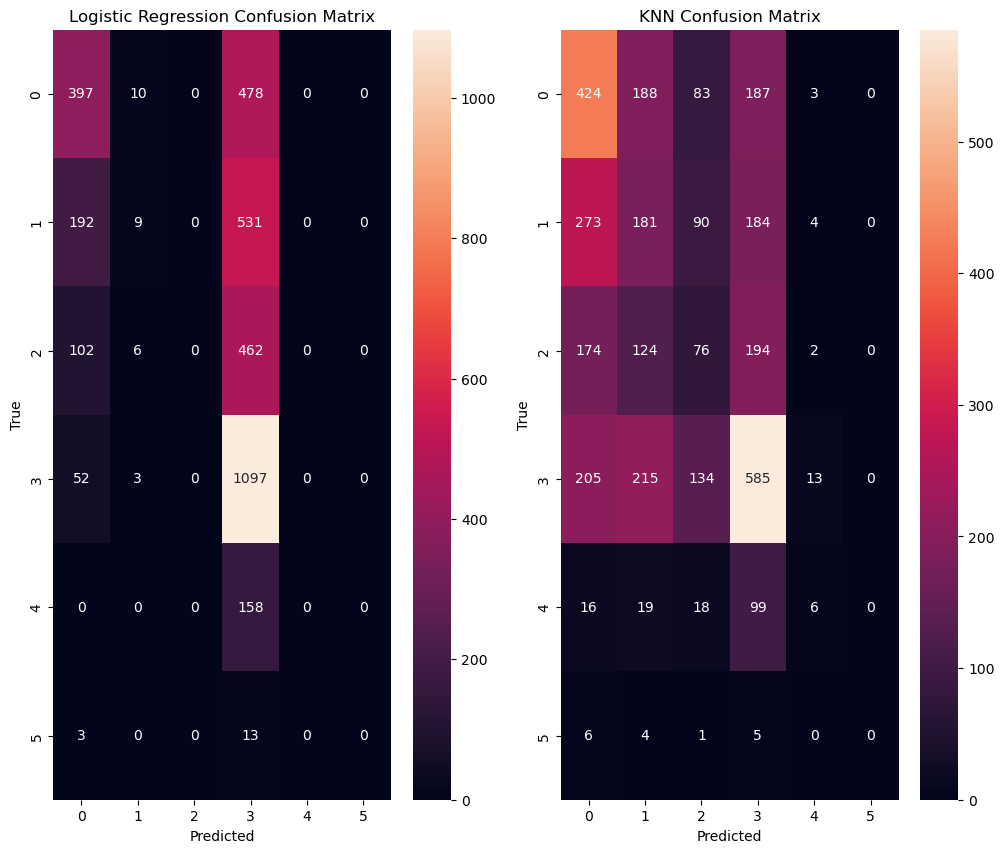

In [31]:
fig,ax  = plt.subplots(1,2, figsize=(12,10))

sns.heatmap(confusion_matrix(y_test,y_pred_log),annot=True,fmt='d', ax =ax[0])
ax[0].set_title("Logistic Regression Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("True")

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", ax=ax[1])
ax[1].set_title("KNN Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("True")

plt.show()
